# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import json
import requests
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#get today's date
today = datetime.datetime.now().strftime("%d/%m/%Y")

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = url + "appid=" + weather_api_key + "&q=" + "Stourbridge"
search_result = requests.get(query_url).json()
pprint(search_result)

{'base': 'stations',
 'clouds': {'all': 73},
 'cod': 200,
 'coord': {'lat': 52.4561, 'lon': -2.1432},
 'dt': 1627749393,
 'id': 2636769,
 'main': {'feels_like': 290.96,
          'humidity': 76,
          'pressure': 1010,
          'temp': 291.12,
          'temp_max': 292.92,
          'temp_min': 288.82},
 'name': 'Stourbridge',
 'sys': {'country': 'GB',
         'id': 2012430,
         'sunrise': 1627705625,
         'sunset': 1627761760,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 313, 'gust': 4.37, 'speed': 3.43}}


In [4]:
#lists to store data
city_id_list = []
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = [] 
max_temp_list = [] 
wind_speed_list = []

#counter instead of using position in list (fix later)
i = 1
x = 1
count_set = 1
# Set url for API
url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval\n-----------------------------")

for city in cities:
    #search every result
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    search_result = requests.get(query_url).json()
    try: 
        #try if name can append
        city_append = city_list.append(search_result["name"])
        cloudiness = cloudiness_list.append(search_result["clouds"]["all"])
        country = country_list.append(search_result["sys"]["country"])
        date = date_list.append(search_result["dt"])
        humidity = humidity_list.append(search_result["main"]["humidity"]) 
        lat = lat_list.append(search_result["coord"]["lat"]) 
        lng = lng_list.append(search_result["coord"]["lon"]) 
        max_temp = max_temp_list.append(search_result["main"]["temp_max"]) 
        wind_speed = wind_speed_list.append(search_result["wind"]["speed"])
        city_id = city_id_list.append(i)
        print(f"Processing Record {x} of Set {count_set} | {city}")
    except KeyError: 
        #print error message if name cannot append
        print(f"-----------------------------\nResult {x}, Set {count_set}: {city}, not found, moving to next result appended\n-----------------------------")
    
    i = i + 1
    x = x + 1
    if x > 50:
        x = 0
        count_set = count_set + 1
        time.sleep(60)
    
#inform of finished process
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | karratha
Processing Record 2 of Set 1 | alice springs
Processing Record 3 of Set 1 | norman wells
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | sur
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | coihaique
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | geraldton
-----------------------------
Result 17, Set 1: belushya guba, not found, moving to next result appended
-----------------------------
-----------------------------
Result 18, Set 1: ngukurr, not found, moving to next result appended
-----------------------------
-------------------

Processing Record 8 of Set 4 | kruisfontein
Processing Record 9 of Set 4 | dicabisagan
Processing Record 10 of Set 4 | vostok
Processing Record 11 of Set 4 | bilma
Processing Record 12 of Set 4 | sioux lookout
Processing Record 13 of Set 4 | huanuni
Processing Record 14 of Set 4 | chuy
Processing Record 15 of Set 4 | faanui
Processing Record 16 of Set 4 | alofi
Processing Record 17 of Set 4 | pamanukan
Processing Record 18 of Set 4 | las palmas
Processing Record 19 of Set 4 | barcelos
Processing Record 20 of Set 4 | ilhabela
Processing Record 21 of Set 4 | kalmunai
Processing Record 22 of Set 4 | puerto cabezas
Processing Record 23 of Set 4 | codrington
Processing Record 24 of Set 4 | port hardy
Processing Record 25 of Set 4 | waitara
Processing Record 26 of Set 4 | avarua
Processing Record 27 of Set 4 | erzin
Processing Record 28 of Set 4 | broken hill
Processing Record 29 of Set 4 | dikson
Processing Record 30 of Set 4 | luderitz
Processing Record 31 of Set 4 | wattegama
Processing R

Processing Record 27 of Set 7 | sao goncalo dos campos
Processing Record 28 of Set 7 | mahanoro
Processing Record 29 of Set 7 | nijar
Processing Record 30 of Set 7 | guerrero negro
Processing Record 31 of Set 7 | korla
Processing Record 32 of Set 7 | leua
Processing Record 33 of Set 7 | kitimat
Processing Record 34 of Set 7 | san quintin
Processing Record 35 of Set 7 | nago
Processing Record 36 of Set 7 | pokhara
Processing Record 37 of Set 7 | lazaro cardenas
Processing Record 38 of Set 7 | la foa
Processing Record 39 of Set 7 | durban
Processing Record 40 of Set 7 | iquique
Processing Record 41 of Set 7 | marzuq
Processing Record 42 of Set 7 | victoria
Processing Record 43 of Set 7 | parrita
Processing Record 44 of Set 7 | nicoya
Processing Record 45 of Set 7 | la ronge
Processing Record 46 of Set 7 | sierre
Processing Record 47 of Set 7 | peniche
Processing Record 48 of Set 7 | gotsu
Processing Record 49 of Set 7 | paamiut
Processing Record 50 of Set 7 | esperance
Processing Record 

Processing Record 3 of Set 11 | kenai
Processing Record 4 of Set 11 | groa
Processing Record 5 of Set 11 | pekan
Processing Record 6 of Set 11 | shaoxing
-----------------------------
Result 7, Set 11: tingrela, not found, moving to next result appended
-----------------------------
Processing Record 8 of Set 11 | manavalakurichi
Processing Record 9 of Set 11 | jasper
Processing Record 10 of Set 11 | lompoc
Processing Record 11 of Set 11 | hudson bay
Processing Record 12 of Set 11 | henties bay
Processing Record 13 of Set 11 | havoysund
Processing Record 14 of Set 11 | roma
Processing Record 15 of Set 11 | dolores
-----------------------------
Result 16, Set 11: kamenskoye, not found, moving to next result appended
-----------------------------
-----------------------------
Result 17, Set 11: rungata, not found, moving to next result appended
-----------------------------
Processing Record 18 of Set 11 | mayor pablo lagerenza
Processing Record 19 of Set 11 | bathsheba
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_summary = pd.DataFrame({
    "City" : city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,   
    "Cloudiness": cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list
})

#convert to celcius
#lambda takes the dataframe as value x and uses its temp column to reutrn a value converted to celc
city_summary["Max Temp"] = city_summary.apply(lambda x: (x["Max Temp"]-273.15),axis=1)

#export csv
city_summary.index.name='City ID'
city_summary.to_csv("../output_data/cities")

#display in dataframe
city_summary.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,Karratha,-20.7377,116.8463,18.48,43,3,5.08,AU,1627749576
1,Alice Springs,-23.7000,133.8833,17.75,32,0,3.09,AU,1627749576
2,Norman Wells,65.2820,-126.8329,20.02,68,75,2.06,CA,1627749576
3,Bredasdorp,-34.5322,20.0403,13.62,82,94,1.54,ZA,1627749576
4,Castro,-24.7911,-50.0119,13.65,50,100,3.39,BR,1627749576


In [9]:
#inspect data
city_summary.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.141194,15.073134,22.227552,66.664336,51.138112,3.577080,1.627750e+09
std,32.498647,92.454052,8.180766,22.593939,37.698595,2.392447,2.410350e+02
min,-54.800000,-179.166700,0.270000,8.000000,0.000000,0.000000,1.627749e+09
25%,-6.071225,-69.015800,16.235000,54.000000,12.000000,1.917500,1.627750e+09
50%,23.063400,19.567250,23.210000,72.000000,50.000000,3.080000,1.627750e+09
75%,46.518350,102.334775,27.560000,84.000000,90.000000,5.002500,1.627750e+09
max,78.218600,178.416700,45.240000,100.000000,100.000000,13.380000,1.627750e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#removes data
city_weather_df = city_summary[city_summary["Humidity"] <= 100]

#checks no humidity over 100 to ensure functioning properly
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.141194,15.073134,22.227552,66.664336,51.138112,3.577080,1.627750e+09
std,32.498647,92.454052,8.180766,22.593939,37.698595,2.392447,2.410350e+02
min,-54.800000,-179.166700,0.270000,8.000000,0.000000,0.000000,1.627749e+09
25%,-6.071225,-69.015800,16.235000,54.000000,12.000000,1.917500,1.627750e+09
50%,23.063400,19.567250,23.210000,72.000000,50.000000,3.080000,1.627750e+09
75%,46.518350,102.334775,27.560000,84.000000,90.000000,5.002500,1.627750e+09
max,78.218600,178.416700,45.240000,100.000000,100.000000,13.380000,1.627750e+09


In [11]:
#  gathers all removed data
humid_over_100 =  city_summary[city_summary["Humidity"] > 100]


# shows all removed data
humid_over_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

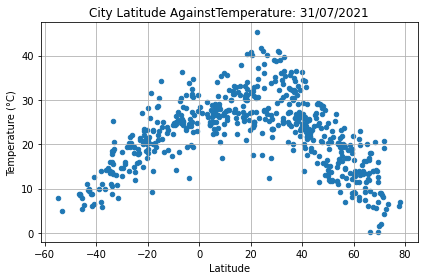

In [12]:
ax = city_weather_df.plot(kind="scatter", x="Lat", y="Max Temp")
plt.title(f"City Latitude AgainstTemperature: {today}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.grid()

ax.figure.savefig("../output_data/fig1")

This plot models the relationship between the distance from the equator and the max tempurature of a country.

We can see countries closer to the eqautor have higher max tempuratures. As the Earth is closest to the sun at the equator. Temperatures decrease sharply as latitud deviates from 0. 

## Latitude vs. Humidity Plot

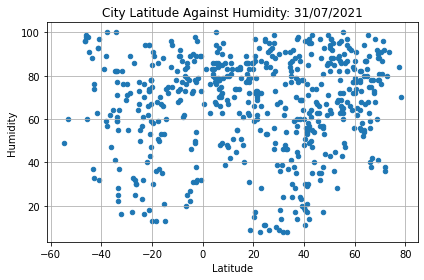

In [13]:
ax = city_weather_df.plot(kind="scatter", x="Lat", y="Humidity")
plt.title(f"City Latitude Against Humidity: {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.grid()

ax.figure.savefig("../output_data/fig2")

There is not a strong correlation between latitude and humidity. However we can observe a potential spike in humidity closer to the equator (due to the higher tempurature). In our sample, it is more likely for a city to have a higher humidty. 

## Latitude vs. Cloudiness Plot

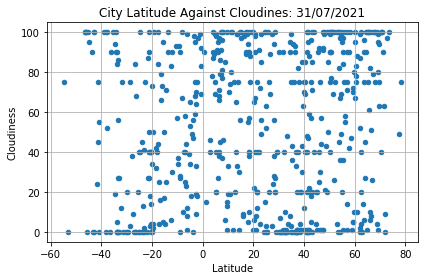

In [14]:
ax = city_weather_df.plot(kind="scatter", x="Lat", y="Cloudiness")
plt.title(f"City Latitude Against Cloudines: {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.grid()

ax.figure.savefig("../output_data/fig3")

We can see in our data the cities gravitate towards high or low levels of cloudiness. Although this does not seem to be affected by latitude, it is noteable that cities fall towards more absolute levels of cloudiness. 

## Latitude vs. Wind Speed Plot

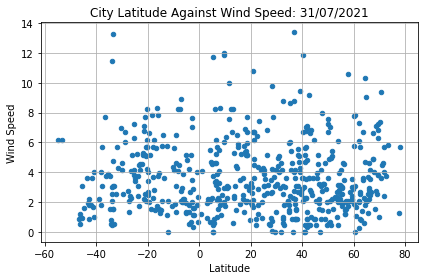

In [15]:
ax = city_weather_df.plot(kind="scatter", x="Lat", y="Wind Speed")
plt.title(f"City Latitude Against Wind Speed: {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.tight_layout()
plt.grid()

ax.figure.savefig("../output_data/fig4")

We can see a small, albeit not very significant trend between moving away from the southern hemisphere and a decrease in wind speeds for a city.

## Linear Regression

In [16]:
north_hem_df = city_weather_df[city_weather_df["Lat"] >= 0]
south_hem_df = city_weather_df[city_weather_df["Lat"] < 0]

x_axis = "Lat"
y_axes = ["Max Temp","Humidity","Cloudiness","Wind Speed"]
line_regress_dict = {}
south_dict = {}
slope_dict = {} 
intercept_dict = {}

for y_axis in y_axes:
    x_values = north_hem_df["Lat"]
    y_values = north_hem_df[y_axis]
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_regress_dict["North {0}".format(y_axis)] = regress_values
    slope_dict["North {0}".format(y_axis)] = slope
    intercept_dict["North {0}".format(y_axis)] = intercept
    
    x_values = south_hem_df["Lat"]
    y_values = south_hem_df[y_axis]
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_regress_dict["South {0}".format(y_axis)] = regress_values
    slope_dict["South {0}".format(y_axis)] = slope
    intercept_dict["South {0}".format(y_axis)] = intercept
    
intercept_dict

{'North Max Temp': 34.48412669990183,
 'South Max Temp': 28.624461349873226,
 'North Humidity': 66.24348907765963,
 'South Humidity': 63.471245872919596,
 'North Cloudiness': 51.375007395193634,
 'South Cloudiness': 45.72390072164198,
 'North Wind Speed': 3.746256761351963,
 'South Wind Speed': 3.670190004961418}

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

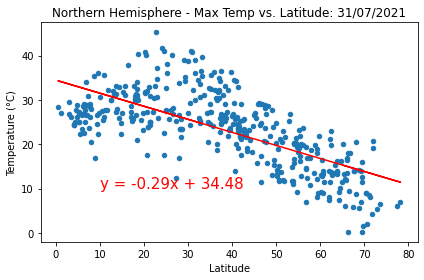

In [17]:
north_hem_df.plot(kind="scatter", x="Lat", y="Max Temp")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.plot(north_hem_df["Lat"],line_regress_dict["North Max Temp"],"r-")
line_eq = "y = " + str(round(slope_dict["North Max Temp"],2)) + "x + " + str(round(intercept_dict["North Max Temp"],2))
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.tight_layout()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

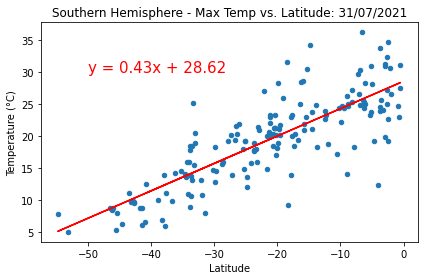

In [18]:
south_hem_df.plot(kind="scatter", x="Lat", y="Max Temp")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.plot(south_hem_df["Lat"],line_regress_dict["South Max Temp"],"r-")
line_eq = "y = " + str(round(slope_dict["South Max Temp"],2)) + "x + " + str(round(intercept_dict["South Max Temp"],2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.tight_layout()


We can see on each plot, as we lattitude gets closer to zero, the max tempurature increases. These plots show us that moving away from the equate will lead to lower maximum temperatures.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

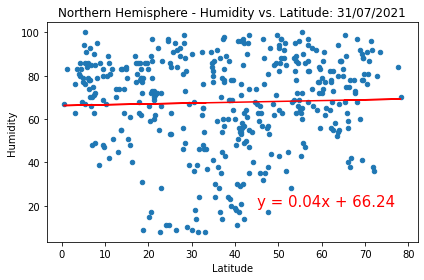

In [19]:
north_hem_df.plot(kind="scatter", x="Lat", y="Humidity")
plt.title(f"Northern Hemisphere - Humidity vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(north_hem_df["Lat"],line_regress_dict["North Humidity"],"r-")
line_eq = "y = " + str(round(slope_dict["North Humidity"],2)) + "x + " + str(round(intercept_dict["North Humidity"],2))
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.tight_layout()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

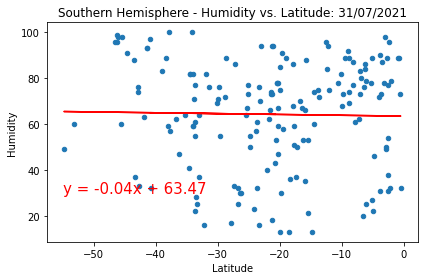

In [20]:
south_hem_df.plot(kind="scatter", x="Lat", y="Humidity")
plt.title(f"Southern Hemisphere - Humidity vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(south_hem_df["Lat"],line_regress_dict["South Humidity"],"r-")
line_eq = "y = " + str(round(slope_dict["South Humidity"],2)) + "x + " + str(round(intercept_dict["South Humidity"],2))
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.tight_layout()


We can observe that both plotsshow a weak correlation away from 0 latitude. This is not significant enough to directly associate with the latitude, but does show consitenct in behaviour between the two hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

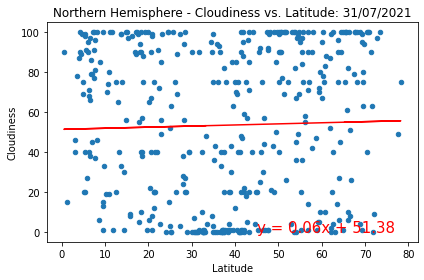

In [21]:
north_hem_df.plot(kind="scatter", x="Lat", y="Cloudiness")
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(north_hem_df["Lat"],line_regress_dict["North Cloudiness"],"r-")
line_eq = "y = " + str(round(slope_dict["North Cloudiness"],2)) + "x + " + str(round(intercept_dict["North Cloudiness"],2))
plt.annotate(line_eq,(45,0),fontsize=15,color="red")
plt.tight_layout()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

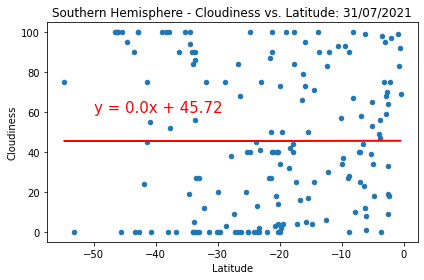

In [22]:
south_hem_df.plot(kind="scatter", x="Lat", y="Cloudiness")
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(south_hem_df["Lat"],line_regress_dict["South Cloudiness"],"r-")
line_eq = "y = " + str(round(slope_dict["South Cloudiness"],2)) + "x + " + str(round(intercept_dict["South Cloudiness"],2))
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.tight_layout()

Across both plots we can see a correlation between deviating from the equator and an increase in cloudiness. This can be explained and supported by the higher temperatures closer to 0 latitude. Warmer cities are more likely to experience less rain and consequently, less clouds.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

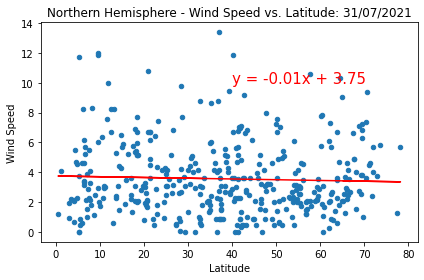

In [23]:
north_hem_df.plot(kind="scatter", x="Lat", y="Wind Speed")
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(north_hem_df["Lat"],line_regress_dict["North Wind Speed"],"r-")
line_eq = "y = " + str(round(slope_dict["North Wind Speed"],2)) + "x + " + str(round(intercept_dict["North Wind Speed"],2))
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.tight_layout()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

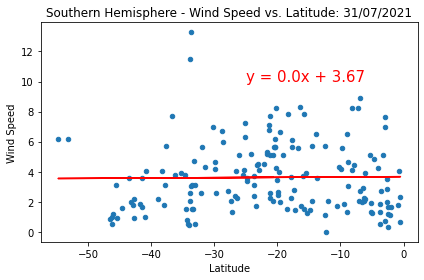

In [24]:
south_hem_df.plot(kind="scatter", x="Lat", y="Wind Speed")
plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude: {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(south_hem_df["Lat"],line_regress_dict["South Wind Speed"],"r-")
line_eq = "y = " + str(round(slope_dict["South Wind Speed"],2)) + "x + " + str(round(intercept_dict["South Wind Speed"],2))
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.tight_layout()

There is a moderate negative correlation in the southern hemisphere, showing a clear decrease in temperatures as we approach 0 latitude. However, this trend is much weaker with the northern hemisphere. As we deviate from the equator, wind speeds do continue to decrease as strongly as with in the lower hemisphere.